## Implementation of Kaczmarz algorithm for updating the weights in a Polynomial linear regrsssion

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random
from sklearn.preprocessing import PolynomialFeatures

#New! for Legendre
from scipy.special import legendre

In [12]:
## Function to generate polynomial features
## This function can be also defined using a for loop and plain NumPy

def generate_design_matrix_from_1D_data(x_initial,polynomial_order):
    """
    Input: 
    x_initial: shape=(N,) where 'N' is the number of samples
    polynomial_order: scalar: the order of polynomial you want to fit to the data
    
    ouput: design_matrix: shape=(N,polynomial_order+1)
    """
    # Check if x_initial is a scalar
    if np.isscalar(x_initial):
        # If it is, convert it to a numpy array
        x_initial = np.array([x_initial])
    elif isinstance(x_initial, list):
        # If it is a list, convert it to a numpy array
        x_initial = np.array(x_initial)

        
    
    # Generate the polynomial features using sklearn_preprocessing package
    poly_features=PolynomialFeatures(degree=polynomial_order)

    # Update the design matrix using the polynomial features created in the previous step
    design_matrix=poly_features.fit_transform(x_initial.reshape(-1,1))

    return design_matrix

In [13]:
np.random.seed(14)
X_initial_matrix = np.random.random((10,1))
print('X_initial_matrix: ', X_initial_matrix.shape)

X_initial_matrix = X_initial_matrix[:,0]
print('X_initial_matrix: ', X_initial_matrix)
print(X_initial_matrix.shape)
desgin_matrix = generate_design_matrix_from_1D_data(X_initial_matrix,2)
print('desgin_matrix : ', desgin_matrix )

X_initial_matrix:  (10, 1)
X_initial_matrix:  [0.51394334 0.77316505 0.87042769 0.00804695 0.30973593 0.95760374
 0.51311671 0.31828442 0.53919994 0.22125494]
(10,)
desgin_matrix :  [[1.00000000e+00 5.13943344e-01 2.64137761e-01]
 [1.00000000e+00 7.73165052e-01 5.97784198e-01]
 [1.00000000e+00 8.70427686e-01 7.57644356e-01]
 [1.00000000e+00 8.04694853e-03 6.47533806e-05]
 [1.00000000e+00 3.09735926e-01 9.59363435e-02]
 [1.00000000e+00 9.57603739e-01 9.17004922e-01]
 [1.00000000e+00 5.13116712e-01 2.63288760e-01]
 [1.00000000e+00 3.18284425e-01 1.01304975e-01]
 [1.00000000e+00 5.39199937e-01 2.90736573e-01]
 [1.00000000e+00 2.21254942e-01 4.89537495e-02]]


In [14]:
np.random.seed(100)
X_initial_case_train = np.random.random((150,150))
X_initial_case_test = np.random.random((150,150))

x_intial_case_train = X_initial_case_train[:,0]
y_target_case_train = X_initial_case_train[:,1]

x_intial_case_test = X_initial_case_test[:,0]
y_target_case_test = X_initial_case_test[:,1]

polynomial_order = 10

design_x_initial_case_train = generate_design_matrix_from_1D_data(x_intial_case_train,polynomial_order)
design_x_initial_case_test = generate_design_matrix_from_1D_data(x_intial_case_test,polynomial_order)

your_answer = design_x_initial_case_train[0]
print(f'design_x_initial_case_train:{design_x_initial_case_train.shape}')
correct_answer = np.array([1.,0.54340494,0.29528893,0.16046146,0.08719555,0.04738249,0.02574788,0.01399153,0.00760306,0.00413154,0.0022451])
print(your_answer.shape)
print(correct_answer.shape)
print(your_answer)
assert your_answer.shape == (11,)
assert np.array_equal(your_answer.round(5),correct_answer.round(5))
print('Your function looks good!')

design_x_initial_case_train:(150, 11)
(11,)
(11,)
[1.         0.54340494 0.29528893 0.16046146 0.08719555 0.04738249
 0.02574788 0.01399153 0.00760306 0.00413154 0.0022451 ]
Your function looks good!


In [15]:
def pseudo_inv(x):
    
    a=np.linalg.inv(x.T@(x))

    return a @ x.T

In [16]:
def max_likelyhood_fit(design_matrix,target_values):
    """
    Input: 
    design_matrix: shape=(N,polynomial_order+1)
    target_values: shape=(N,)
    
    ouput: weight_predictions: shape=(polynomial_order+1,)
    beta_parameter: scalar
    """
    beta_parameter = 0
    weight_predictions = np.ones(design_matrix.shape[1]) #polynomial order starting from 0
    # copy your code after this line
    
    N, M = design_matrix.shape
    assert N == len(target_values)
    
    weight_predictions = pseudo_inv(design_matrix) @ target_values
    
    residual_errors = target_values - design_matrix @ weight_predictions
    sse = residual_errors.T @ residual_errors
    beta_parameter = sse / (N - M)

    return weight_predictions, beta_parameter

In [17]:
# Test for Max Likelyhood function
np.random.seed(100)
boundary = np.random.randint(50,150)
X_initial_case_train = np.random.random((boundary,2))
x_intial_case_train = X_initial_case_train[:,0]
print('x_intial_case_train: ', x_intial_case_train.shape)
y_target_case_train = X_initial_case_train[:,1]
print('y_target_case_train: ', y_target_case_train.shape)


polynomial_order = np.random.randint(5,20)
print('polynomial_order: ', polynomial_order)

x_intial_case_train = generate_design_matrix_from_1D_data(x_intial_case_train,polynomial_order)
print('x_intial_case_train: ', x_intial_case_train.shape)
your_weights,your_beta_parameter = max_likelyhood_fit(x_intial_case_train,y_target_case_train)

correct_weights = np.array([7.05804010e-02,1.65034997e+01,-1.97504919e+02,1.12260234e+03,
                  -3.30344154e+03,5.10641884e+03,-3.92550598e+03,1.18161086e+03])
print(f'your_weights:{your_weights}')
print(f'your_weights:{your_weights.shape}')
assert your_weights.shape == (8,)
assert np.allclose(your_weights.round(5),correct_weights.round(5),atol=1e-8)
print('Your function looks good!')

x_intial_case_train:  (58,)
y_target_case_train:  (58,)
polynomial_order:  7
x_intial_case_train:  (58, 8)
your_weights:[ 7.05803119e-02  1.65035043e+01 -1.97504978e+02  1.12260266e+03
 -3.30344240e+03  5.10642006e+03 -3.92550685e+03  1.18161111e+03]
your_weights:(8,)
Your function looks good!


In [18]:
def kaczmarz(design_matrix,target_values,iterations):
    """
    Input: 
    design_matrix: shape=(N,polynomial_order+1)
    target_values: shape=(N,)
    
    ouput: weight_predictions: shape=(polynomial_order+1,)
    beta_parameter: scalar
    """
    beta_parameter = 0
    weight_predictions = np.zeros(design_matrix.shape[1]) #polynomial order starting from 0


    N, polynomial_order = design_matrix.shape
    # N is the number of observations, and it is equal to the polynomial degree +1 to account for x**0, always one more to determine the intercept

    print('N, polynomial_order : ',  N, polynomial_order, "\n\n\n")


    for k in range(iterations):
        for i in range(N):

            a = design_matrix[i,:]
    
            # print('a: ', a.shape)
            # print('weight_predictions: ', weight_predictions.shape)
            # print('target_values: ', target_values.shape)
            # print('np.linalg.norm(a)**2: ', np.linalg.norm(a)**2)
            
            weight_predictions = weight_predictions + ((target_values[i] - np.dot(a, weight_predictions)) / np.linalg.norm(a)**2) * a.T


    # This is for beta

    residual_errors = target_values - design_matrix @ weight_predictions
    sse = residual_errors.T @ residual_errors
    beta_parameter = sse / (N - polynomial_order)

    return weight_predictions, beta_parameter

In [19]:
np.random.seed(100)
boundary = np.random.randint(50,150)
X_initial_case_train = np.random.random((boundary,2))
x_intial_case_train = X_initial_case_train[:,0]
print('x_intial_case_train: ', x_intial_case_train.shape)
y_target_case_train = X_initial_case_train[:,1]
print('y_target_case_train: ', y_target_case_train.shape)

np.dot(x_intial_case_train,y_target_case_train)



x_intial_case_train:  (58,)
y_target_case_train:  (58,)


10.543911434528882

In [20]:
# Generate some random data
x = np.linspace(-1, 1, 100)
y = 2 * x**2 - 3 * x + 1 + np.random.normal(0, 0.5, 100)

# Create the design matrix
design_matrix = generate_design_matrix_from_1D_data(x,2)

# Call the Kaczmarz algorithm
weights, beta = kaczmarz(design_matrix, y, iterations=3)

# Print the weights and beta parameter
print('Weights: ', weights)
print('Beta parameter: ', beta)

N, polynomial_order :  100 3 



Weights:  [ 0.70606857 -3.36695497  2.49625501]
Beta parameter:  0.30162866549529804


In [21]:
def online_kaczmarz(design_matrix,target_values,iterations,r, weights=None):

    beta_parameter = 0
    
    if weights is None:
        weight_predictions = np.zeros(design_matrix.shape[1]) #polynomial order starting from 0
    else:
       weight_predictions = weights

    x = design_matrix[-r:,:]
    print('x: ', x.shape)
    y = target_values[-r:]
    print('y: ', y.shape)



    for k in range(iterations):

        for i in range(r):

            a = x[i,:]
    
            print('a: ', a.shape)
            print('weight_predictions: ', weight_predictions.shape)
            print('target_values: ', target_values.shape)
            print('np.linalg.norm(a)**2: ', np.linalg.norm(a)**2)
            
            weight_predictions = weight_predictions + ((y[i] - np.dot(a, weight_predictions)) / np.linalg.norm(a)**2) * a.T

            print('a.T: ', a.T.shape)
            print('np.dot(a, weight_predictions): ', np.dot(a, weight_predictions).shape)
            print('weight_predictions: ', weight_predictions.shape)


    # This is for beta

    # residual_errors = target_values - design_matrix @ weight_predictions
    # sse = residual_errors.T @ residual_errors
    # beta_parameter = sse / ( - polynomial_order)

    return weight_predictions, beta_parameter

A:  (1, 6)
x:  (25, 6)
y:  (25,)
a:  (6,)
weight_predictions:  (6,)
target_values:  (101,)
np.linalg.norm(a)**2:  1.4009679656622114
a.T:  (6,)
np.dot(a, weight_predictions):  ()
weight_predictions:  (6,)
a:  (6,)
weight_predictions:  (6,)
target_values:  (101,)
np.linalg.norm(a)**2:  1.4451782348672955
a.T:  (6,)
np.dot(a, weight_predictions):  ()
weight_predictions:  (6,)
a:  (6,)
weight_predictions:  (6,)
target_values:  (101,)
np.linalg.norm(a)**2:  1.4938940663861955
a.T:  (6,)
np.dot(a, weight_predictions):  ()
weight_predictions:  (6,)
a:  (6,)
weight_predictions:  (6,)
target_values:  (101,)
np.linalg.norm(a)**2:  1.5476783113040102
a.T:  (6,)
np.dot(a, weight_predictions):  ()
weight_predictions:  (6,)
a:  (6,)
weight_predictions:  (6,)
target_values:  (101,)
np.linalg.norm(a)**2:  1.60717929889564
a.T:  (6,)
np.dot(a, weight_predictions):  ()
weight_predictions:  (6,)
a:  (6,)
weight_predictions:  (6,)
target_values:  (101,)
np.linalg.norm(a)**2:  1.6731438675035946
a.T:  (6,

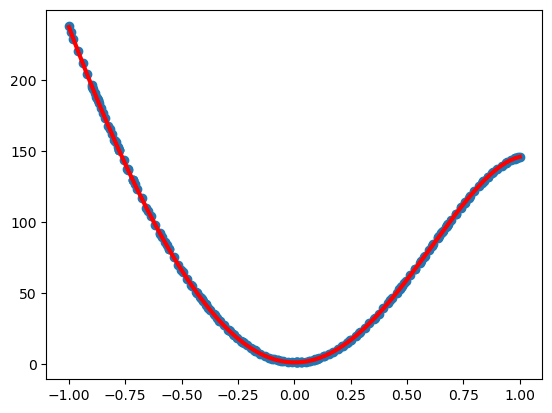

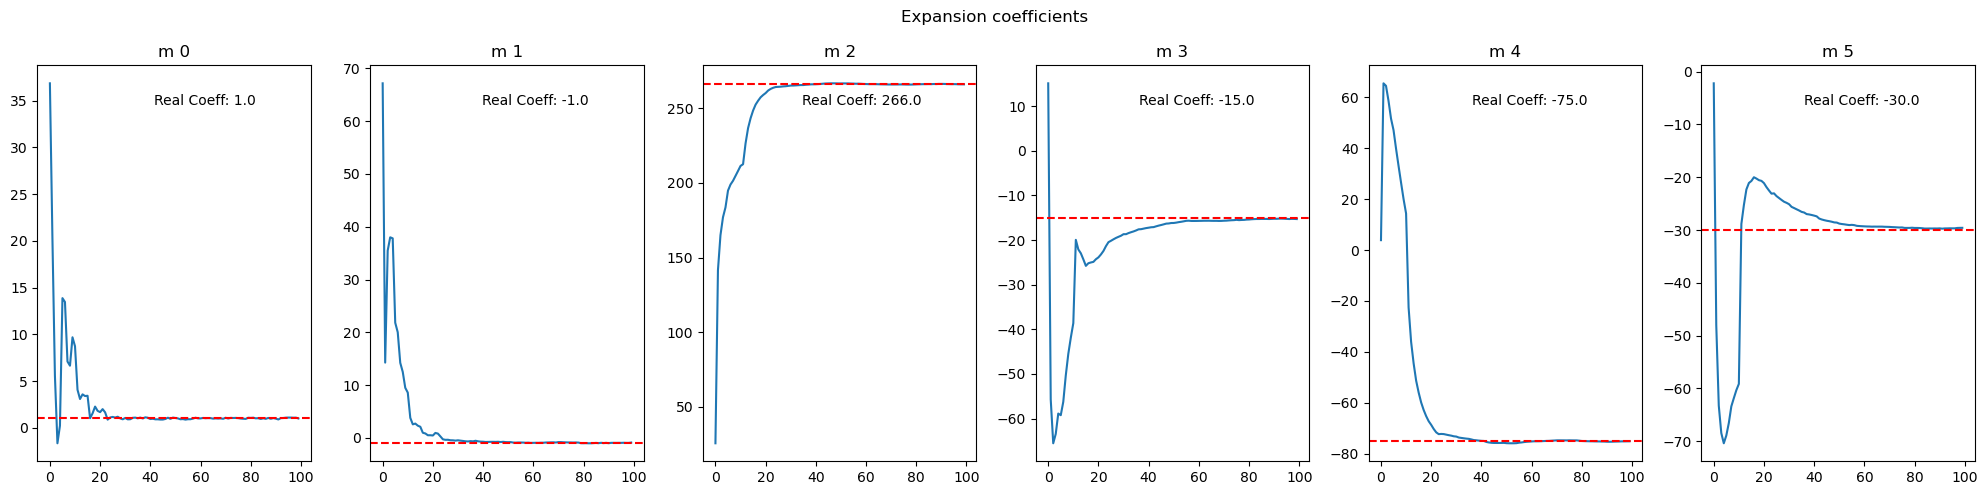

In [23]:
# Test for online Kaczmarz
x = np.linspace(-1, 1, 100)
y = (-30 * x**5) + (-75 * x**4) + (-15 * x**3) + (266 * x**2) + (-1 * x) + 1 + np.random.normal(0, 0.1, 100)
A = np.array([[1, -1, 266, -15, -75, -30]])
print('A: ', A.shape)


################################################################################################
####    Definition of "Hyperparameters"
################################################################################################
t = 100 #timesteps
r = 25 # number of data points used to estimate the coefficientes
iterations = 10 # number of iterations of the projection algorithm, it converges arguably fast!
polynomial_degree = 5

## Initializing array to store the coefficients
coefficients = np.zeros(polynomial_degree+1)


################################################################################################
####    Online estimation of coefficients
################################################################################################

for timestep in range(t):
        
    ## This part just generates new additional points with the same function
    new_x = random.uniform(-1, 1)
    x = np.append(x, new_x)

    new_y = (-30 * new_x**5) + (-75 * new_x**4) + (-15 * new_x**3) + (266 * new_x**2) + (-1 * new_x) + 1 + random.uniform(-0.1, 0.1)
    y = np.append(y, new_y)

    ## This part creates the design matrix that is to be the input X of the estimation algorithm
    design_matrix = generate_design_matrix_from_1D_data(x,polynomial_degree)


    ## At the first iteration "timestep, t", start with randomized weights
    if timestep == 0:
        weight_predictions, beta_parameter = online_kaczmarz(design_matrix,y,iterations,r)
    
    ## At iteration "timestep, t">=1, start with the previously estimated coefficients
    else:
        # Assume data is a numpy array with shape (poly_order+1, timesteps)
        l = coefficients[:, -1]  # Extract the last column
        previous_weights = np.squeeze(l)  # Remove dimensions of size 1

        weight_predictions, beta_parameter = online_kaczmarz(design_matrix,y,iterations,r, previous_weights) ##########
    
    
    # print('weight_predictions: ', weight_predictions)
    
    coefficients = np.column_stack((coefficients, weight_predictions))



################################################################################################
####    Results
################################################################################################


coefficients = coefficients[:,1:]
print('coefficients shape: ', coefficients.shape)


np.set_printoptions(precision=2)
print('coefficients: ', coefficients[:,-1])
print('Real Coefficients : ', A)





################################################################################################
####    Online estimation of coefficients
################################################################################################

weights = coefficients[:,-1] #Using only the last iteration of the weight prediction]

## Application of the estiamted coefficients to calculate the estimated Y_hat values
y_hat =  generate_design_matrix_from_1D_data(x,polynomial_degree) @ weights.T




################################################################################################
####    Plots and graphs
################################################################################################

# Sort the data by x
sort_indices = np.argsort(x)
x_sorted = x[sort_indices]
y_hat_sorted = y_hat[sort_indices]


# plt.scatter(x,y)
plt.scatter(x, y)
plt.plot((x_sorted), (y_hat_sorted), color='red', linewidth = 3)


# Create a grid of subplots and flatten it
fig, axs = plt.subplots(ncols=polynomial_degree+1, figsize=(20, 5))
axs = axs.flatten()

# Plot each coefficient and add a horizontal line at the mean
for i in range(polynomial_degree+1):
    axs[i].plot(coefficients[i,:])
    mean_value = A[:,i].mean()
    axs[i].axhline(y=mean_value, linestyle='dashed', color='red')
    axs[i].text(0.8, 0.9, f"Real Coeff: {mean_value:.1f}", transform=axs[i].transAxes, ha='right')

# Set titles for the subplots
for i, ax in enumerate(axs):
    ax.set_title(f"m {i}")

# Add a main title to the figure
fig.suptitle('Expansion coefficients')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


    # for i in range(polynomial_degree+1):
    #     # Create a new figure and plot the data
    #     fig, a0 = plt.subplots()
    #     a0.plot(coefficients[i,:])
    #     a0.set_title(f"a {i}")
        
    #     # Add a horizontal at the mean of each coefficient
    #     a0.axhline(y=np.mean(coefficients[i,:]), linestyle='dashed', color='red')
    #     # a0.axhline(y=A[:,i], linestyle='dashed', color='red')

In [24]:
def online_kaczmarz_single_input(design_matrix, target_values, polynomial_degree, weights=None):

    design_matrix = generate_design_matrix_from_1D_data(design_matrix, polynomial_degree)
    
    beta_parameter = 0
    
    if weights is None:
        weight_predictions = np.zeros(design_matrix.shape[1]) #polynomial order starting from 0
    else:
       weight_predictions = weights

    x = design_matrix # vector of observations if multiple input variables, or scalar if 1 random variable
    # print('x : ', x.shape)
    y = target_values # scalar, the y that corresponds to the observed x
    # print('y: ', y.shape)

    
    
    
    
    
    for i in range (design_matrix.shape[0]):
        a = x[-1,:]
        # print('a: ', a.shape)
        
        
        weight_predictions = weight_predictions + ((y[i] - np.dot(a, weight_predictions)) / np.linalg.norm(a)**2) * a.T

        # This is for beta

        # residual_errors = target_values - design_matrix @ weight_predictions
        # sse = residual_errors.T @ residual_errors
        # beta_parameter = sse / ( - polynomial_order)

    return weight_predictions, beta_parameter

In [25]:
def online_kaczmarz_single_input_steps(design_matrix,target_values, weights=None):

    beta_parameter = 0
    
    if weights is None:
        weight_predictions = np.ones(design_matrix.shape[1]) #polynomial order starting from 0
    else:
       weight_predictions = weights

    x = design_matrix # vector of observations if multiple input variables, or scalar if 1 random variable
    print('x : ', x.shape)
    y = target_values # scalar, the y that corresponds to the observed x
    print('y: ', y.shape)

    print('weight_predictions: ', weight_predictions.shape)
    
    print('np.linalg.norm(x)**2: ', np.linalg.norm(x)**2)
    
    
    
    
    
    for i in range (design_matrix.shape[0]):
        a = x[i,:]
        print('a: ', a.shape)
        
        step_1 = np.dot(a, weight_predictions)
        print('step_1: ', step_1)
        print('step_1: ', step_1.shape)

        step_2 = y - step_1
        print('step_2: ', step_2.shape)
        
        step_3 = step_2 / np.linalg.norm(a)**2
        print('step_3: ', step_3.shape)
        
        step_4 = step_3 + a.T
        print('step_4: ', step_4.shape)
        
        weight_predictions = weight_predictions + step_4
        print('weight_predictions: ', weight_predictions.shape)

        # This is for beta

        # residual_errors = target_values - design_matrix @ weight_predictions
        # sse = residual_errors.T @ residual_errors
        # beta_parameter = sse / ( - polynomial_order)

    return weight_predictions, beta_parameter

x :  -0.4476231283724481
y :  7.296488361597642
coefficients shape:  (5, 1000)
coefficients:  [  1.07 -10.09   6.28  -6.08  -2.15]
real_coeffs:  [[  1 -10   7  -6  -3]]


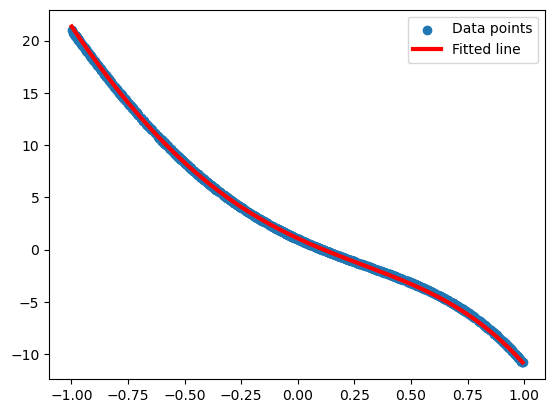

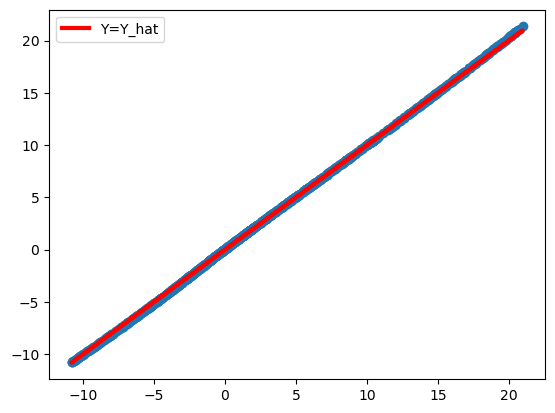

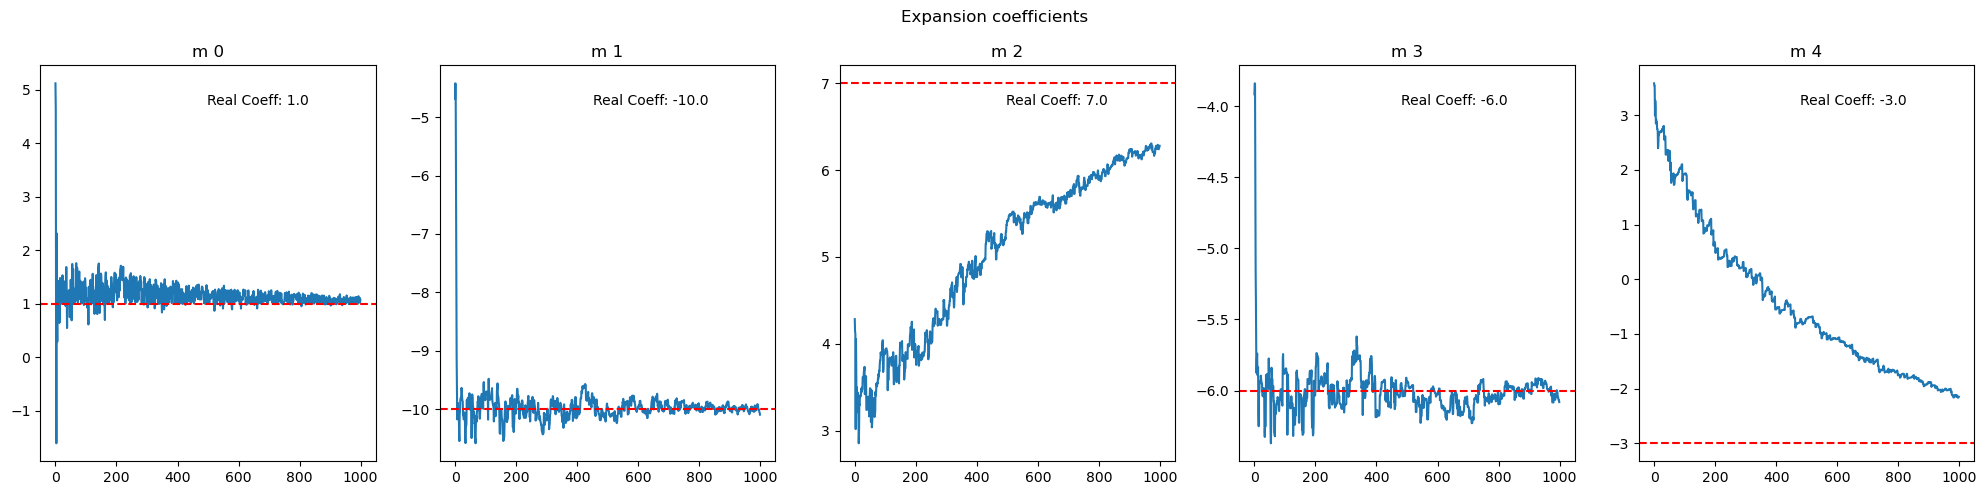

In [26]:
x = random.uniform(-1, 1)
print('x : ', x )

y = (-3 * x**4) + (-6 * x**3) + (7 * x**2) + (-10 * x) + 1 # + np.random.normal(0, 0.1, 1)
print('y : ', y )



real_coeffs = np.array([[1, -10, 7, -6,  -3]])




################################################################################################
####    Definition of "Hyperparameters"
################################################################################################
t = 1000 #timesteps that generate new datapoints, and are the input for the weights estimates
polynomial_degree = 4

## Initializing array to store the coefficients
coefficients = np.zeros(polynomial_degree+1)


################################################################################################
####    Online estimation of coefficients
################################################################################################

for timestep in range(t):
        
    ## This part just generates new additional points with the same function
    new_x = random.uniform(-1, 1)
    x = np.append(x, new_x)

    new_y = (-3 * new_x**4) + (-6 * new_x**3) + (7 * new_x**2) + (-10 * new_x) + 1 # + random.uniform(-0.1, 0.1)
    y = np.append(y, new_y)


    ## At the first iteration "timestep, t", start with randomized weights
    if timestep == 0:
        weight_predictions, beta_parameter = online_kaczmarz_single_input(x, y, polynomial_degree)
    
    ## At iteration "timestep, t">=1, start with the previously estimated coefficients
    else:
        # Assume data is a numpy array with shape (poly_order+1, timesteps)
        l = coefficients[:, -1]  # Extract the last column
        previous_weights = np.squeeze(l)  # Remove dimensions of size 1

        weight_predictions, beta_parameter = online_kaczmarz_single_input(x, y, polynomial_degree, previous_weights) ##########
    
    
    # print('weight_predictions: ', weight_predictions)
    
    coefficients = np.column_stack((coefficients, weight_predictions))



################################################################################################
####    Results
################################################################################################


coefficients = coefficients[:,1:] # All the estimations
print('coefficients shape: ', coefficients.shape)


np.set_printoptions(precision=2)
print('coefficients: ', coefficients[:,-1]) # only the last estimation
print('real_coeffs: ', real_coeffs)



################################################################################################
####    Online estimation of coefficients
################################################################################################

weights = coefficients[:,-1] #Using only the last iteration of the weight prediction]

## Application of the estiamted coefficients to calculate the estimated Y_hat values
y_hat =  generate_design_matrix_from_1D_data(x,polynomial_degree) @ weights.T





################################################################################################
####    Plots and graphs
################################################################################################

# Sort the data by x
sort_indices = np.argsort(x)
x_sorted = x[sort_indices]
y_hat_sorted = y_hat[sort_indices]


# plt.scatter(x,y)
plt.scatter(x, y, label='Data points')
plt.plot(x_sorted, y_hat_sorted, color='red', linewidth = 3, label='Fitted line')
plt.legend()  # This will add a legend to your plot
plt.show()

plt.scatter(y, y_hat)
plt.plot(y,y,color='red', linewidth = 3, label='Y=Y_hat')
plt.legend() 

# Create a grid of subplots and flatten it
fig, axs = plt.subplots(ncols=polynomial_degree+1, figsize=(20, 5))
axs = axs.flatten()

# Plot each coefficient and add a horizontal line at the mean
for i in range(polynomial_degree+1):
    axs[i].plot(coefficients[i,:])
    mean_value = real_coeffs[:,i].mean()
    axs[i].axhline(y=mean_value, linestyle='dashed', color='red')
    axs[i].text(0.8, 0.9, f"Real Coeff: {mean_value:.1f}", transform=axs[i].transAxes, ha='right')

# Set titles for the subplots
for i, ax in enumerate(axs):
    ax.set_title(f"m {i}")

# Add a main title to the figure
fig.suptitle('Expansion coefficients')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [27]:
def generate_legendre_design_matrix(x_initial, polynomial_order):
    # If x_initial is a single number, convert it to a numpy array
    if np.isscalar(x_initial):
        x_initial = np.array([x_initial])
        
    N = len(x_initial)
    design_matrix = np.ones((N, polynomial_order + 1), dtype='float64')
    
    for j in range(polynomial_order + 1):
        P_j = legendre(j)
        for i in range(N):
            design_matrix[i, j] = P_j(x_initial[i])
            
    return design_matrix

In [28]:
x_initial = np.linspace(-1, 1, 10)
polynomial_order = 5

monomial_matrix = generate_design_matrix_from_1D_data(x_initial, polynomial_order)
print('monomial_matrix: ', monomial_matrix)
legendre_matrix = generate_legendre_design_matrix(x_initial, polynomial_order)
print('legendre_matrix: ', legendre_matrix)

monomial_matrix:  [[ 1.00e+00 -1.00e+00  1.00e+00 -1.00e+00  1.00e+00 -1.00e+00]
 [ 1.00e+00 -7.78e-01  6.05e-01 -4.71e-01  3.66e-01 -2.85e-01]
 [ 1.00e+00 -5.56e-01  3.09e-01 -1.71e-01  9.53e-02 -5.29e-02]
 [ 1.00e+00 -3.33e-01  1.11e-01 -3.70e-02  1.23e-02 -4.12e-03]
 [ 1.00e+00 -1.11e-01  1.23e-02 -1.37e-03  1.52e-04 -1.69e-05]
 [ 1.00e+00  1.11e-01  1.23e-02  1.37e-03  1.52e-04  1.69e-05]
 [ 1.00e+00  3.33e-01  1.11e-01  3.70e-02  1.23e-02  4.12e-03]
 [ 1.00e+00  5.56e-01  3.09e-01  1.71e-01  9.53e-02  5.29e-02]
 [ 1.00e+00  7.78e-01  6.05e-01  4.71e-01  3.66e-01  2.85e-01]
 [ 1.00e+00  1.00e+00  1.00e+00  1.00e+00  1.00e+00  1.00e+00]]
legendre_matrix:  [[ 1.   -1.    1.   -1.    1.   -1.  ]
 [ 1.   -0.78  0.41 -0.01 -0.29  0.42]
 [ 1.   -0.56 -0.04  0.4  -0.37  0.04]
 [ 1.   -0.33 -0.33  0.41  0.01 -0.33]
 [ 1.   -0.11 -0.48  0.16  0.33 -0.2 ]
 [ 1.    0.11 -0.48 -0.16  0.33  0.2 ]
 [ 1.    0.33 -0.33 -0.41  0.01  0.33]
 [ 1.    0.56 -0.04 -0.4  -0.37 -0.04]
 [ 1.    0.78  0.41  

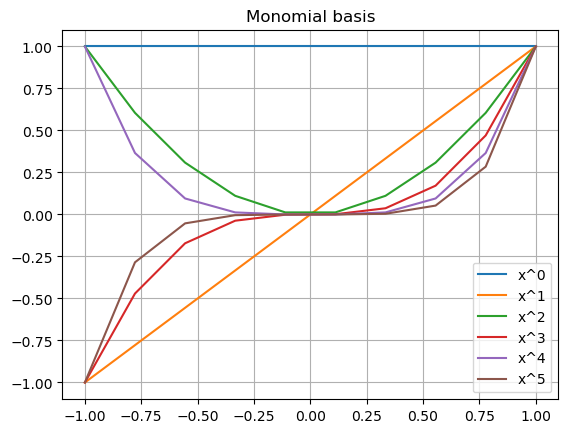

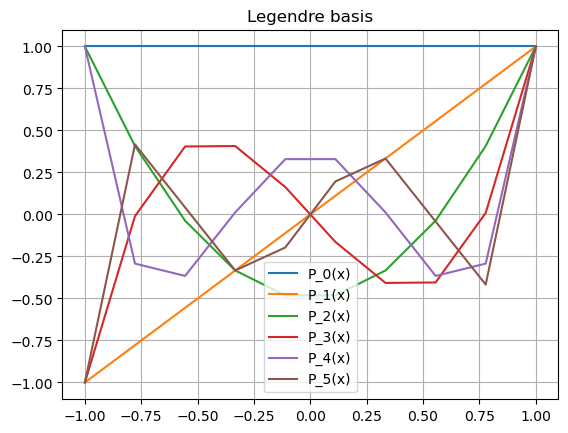

In [29]:
# Plot monomial polynomials
for j in range(polynomial_order + 1):
    plt.plot(x_initial, monomial_matrix[:, j], label=f"x^{j}")
plt.title("Monomial basis")
plt.legend()
plt.grid(True)
plt.show()

# Plot Legendre polynomials
for j in range(polynomial_order + 1):
    plt.plot(x_initial, legendre_matrix[:, j], label=f"P_{j}(x)")
plt.title("Legendre basis")
plt.legend()
plt.grid(True)
plt.show()


In [30]:
def online_kaczmarz_legendre(design_matrix, target_values, polynomial_degree, weights=None):

    design_matrix = generate_legendre_design_matrix(design_matrix, polynomial_degree)
    
    beta_parameter = 0
    
    if weights is None:
        weight_predictions = np.random.rand(design_matrix.shape[1]) #polynomial order starting from 0
    else:
       weight_predictions = weights

    x = design_matrix # vector of observations if multiple input variables, or scalar if 1 random variable
    # print('x : ', x.shape)
    y = target_values # scalar, the y that corresponds to the observed x
    # print('y: ', y.shape)

    
    
    
    
    
    for i in range (design_matrix.shape[0]):
        a = x[-1,:]
        # print('a: ', a.shape)
        
        
        weight_predictions = weight_predictions + ((y[i] - np.dot(a, weight_predictions)) / np.linalg.norm(a)**2) * a.T

        # This is for beta

        # residual_errors = target_values - design_matrix @ weight_predictions
        # sse = residual_errors.T @ residual_errors
        # beta_parameter = sse / ( - polynomial_order)

    return weight_predictions, beta_parameter

In [34]:
def online_kaczmarz_legendre_(design_matrix, target_values, polynomial_degree, weights=None):

    design_matrix = generate_legendre_design_matrix(design_matrix, polynomial_degree)
    
    beta_parameter = 0
    
    if weights is None:
        weight_predictions = np.random.rand(design_matrix.shape[1]) #polynomial order starting from 0
    else:
        weight_predictions = weights

    x = design_matrix # vector of observations if multiple input variables, or scalar if 1 random variable
    y = target_values # scalar, the y that corresponds to the observed x

    for i in range (design_matrix.shape[0]):
        a = x[i,:] # Here's the fix. Now we're iterating over rows.
        
        weight_predictions = weight_predictions + ((y[i] - np.dot(a, weight_predictions)) / np.linalg.norm(a)**2) * a.T

    return weight_predictions, beta_parameter


x :  0.962013320533645
y :  3.632983059899182
coefficients shape:  (4, 500)
real_coeffs:  [[ 0.5 -0.5  1.5  2.5]]
coefficients:  [1. 1. 1. 1.]


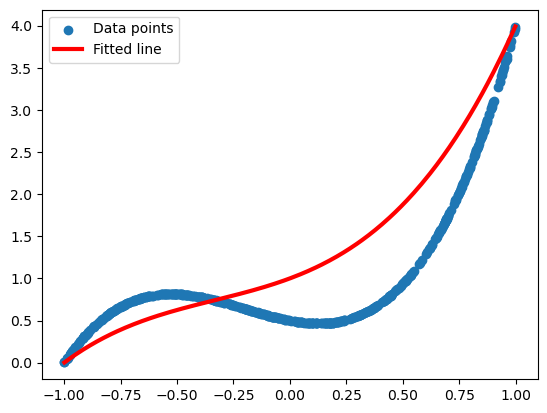

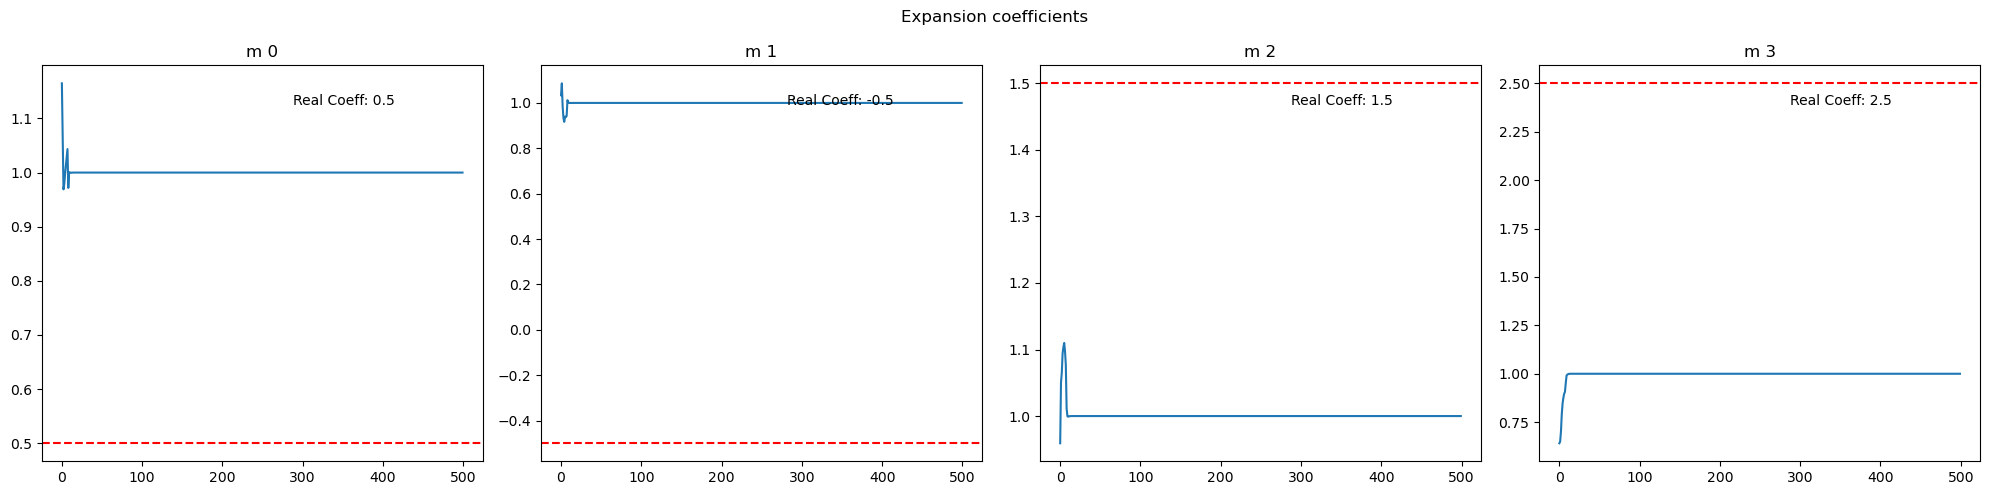

In [35]:
x = random.uniform(-1, 1)
print('x : ', x )

##  //      p_3              //        p_2         // p_1 // p_0
y = 0.5 * ((5*x**3) - (3*x)) + 0.5 * ((3*x**2) - 1) + (x) + 1 
print('y : ', y )



real_coeffs = np.array([[0.5, -0.5, 1.5, 2.5]])




################################################################################################
####    Definition of "Hyperparameters"
################################################################################################
t = 500 #timesteps that generate new datapoints, and are the input for the weights estimates
polynomial_degree = 3

## Initializing array to store the coefficients
coefficients = np.zeros(polynomial_degree+1)


################################################################################################
####    Online estimation of coefficients
################################################################################################

for timestep in range(t):
        
    ## This part just generates new additional points with the same function
    new_x = random.uniform(-1, 1)
    x = np.append(x, new_x)

    new_y = 0.5 * ((5*new_x**3) - (3*new_x)) + 0.5 * ((3*new_x**2) - 1) + (new_x) + 1  # + random.uniform(-0.1, 0.1)
    y = np.append(y, new_y)


    ## At the first iteration "timestep, t", start with randomized weights
    if timestep == 0:
        weight_predictions, beta_parameter = online_kaczmarz_legendre_(x, y, polynomial_degree)
    
    ## At iteration "timestep, t">=1, start with the previously estimated coefficients
    else:
        # Assume data is a numpy array with shape (poly_order+1, timesteps)
        l = coefficients[:, -1]  # Extract the last column
        previous_weights = np.squeeze(l)  # Remove dimensions of size 1

        weight_predictions, beta_parameter = online_kaczmarz_legendre_(x, y, polynomial_degree, previous_weights) ##########
    
    
    # print('weight_predictions: ', weight_predictions)
    
    coefficients = np.column_stack((coefficients, weight_predictions))



################################################################################################
####    Results
################################################################################################


coefficients = coefficients[:,1:] # All the estimations
print('coefficients shape: ', coefficients.shape)


np.set_printoptions(precision=2)
print('real_coeffs: ', real_coeffs)
print('coefficients: ', coefficients[:,-1]) # only the last estimation




################################################################################################
####    Online estimation of coefficients
################################################################################################

weights = coefficients[:,-1] #Using only the last iteration of the weight prediction]

## Application of the estiamted coefficients to calculate the estimated Y_hat values
y_hat =  generate_design_matrix_from_1D_data(x,polynomial_degree) @ weights.T





################################################################################################
####    Plots and graphs
################################################################################################

# Sort the data by x
sort_indices = np.argsort(x)
x_sorted = x[sort_indices]
y_hat_sorted = y_hat[sort_indices]


# plt.scatter(x,y)
plt.scatter(x, y, label='Data points')
plt.plot(x_sorted, y_hat_sorted, color='red', linewidth = 3, label='Fitted line')
plt.legend()  # This will add a legend to your plot


# Create a grid of subplots and flatten it
fig, axs = plt.subplots(ncols=polynomial_degree+1, figsize=(20, 5))
axs = axs.flatten()

# Plot each coefficient and add a horizontal line at the mean
for i in range(polynomial_degree+1):
    axs[i].plot(coefficients[i,:])
    mean_value = real_coeffs[:,i].mean()
    axs[i].axhline(y=mean_value, linestyle='dashed', color='red')
    axs[i].text(0.8, 0.9, f"Real Coeff: {mean_value:.1f}", transform=axs[i].transAxes, ha='right')

# Set titles for the subplots
for i, ax in enumerate(axs):
    ax.set_title(f"m {i}")

# Add a main title to the figure
fig.suptitle('Expansion coefficients')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


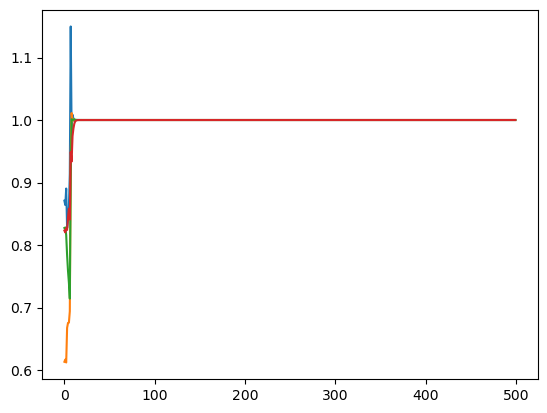

In [36]:
import numpy as np
from numpy.polynomial.legendre import Legendre as legendre
import matplotlib.pyplot as plt

def generate_legendre_design_matrix(x_initial, polynomial_order):
    if np.isscalar(x_initial):
        x_initial = np.array([x_initial])
    N = len(x_initial)
    design_matrix = np.ones((N, polynomial_order + 1), dtype='float64')
    for j in range(polynomial_order + 1):
        P_j = legendre.basis(j)
        for i in range(N):
            design_matrix[i, j] = P_j(x_initial[i])
    return design_matrix

def online_kaczmarz_legendre(design_matrix, target_values, polynomial_degree, weights=None):
    if weights is None:
        weight_predictions = np.random.rand(design_matrix.shape[1])
    else:
        weight_predictions = weights
    x = design_matrix
    y = target_values
    for i in range(design_matrix.shape[0]):
        a = x[i, :] 
        weight_predictions = weight_predictions + ((y[i] - np.dot(a, weight_predictions)) / np.linalg.norm(a)**2) * a.T
    return weight_predictions

t = 500
x = np.random.uniform(-1, 1, size=(t,1)) # Generate all x upfront
y = 0.5 * ((5*x**3) - (3*x)) + 0.5 * ((3*x**2) - 1) + (x) + 1 # Generate all y upfront

polynomial_degree = 3
coefficients = np.zeros((t, polynomial_degree+1))
weights = np.random.rand(polynomial_degree + 1)

for timestep in range(t):
    x_current = x[:timestep+1]
    y_current = y[:timestep+1]
    weights = online_kaczmarz_legendre(generate_legendre_design_matrix(x_current, polynomial_degree), y_current, polynomial_degree, weights)
    coefficients[timestep, :] = weights

plt.plot(coefficients)
plt.show()
